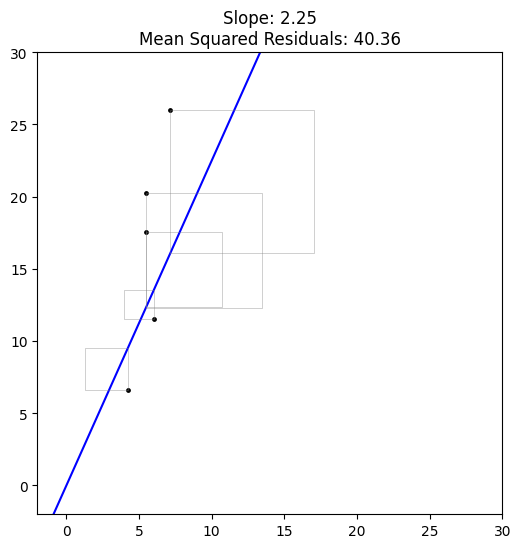

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Generate random data
np.random.seed(0)
num_points = 5
x = np.sort(10 * np.random.rand(num_points))
y = 2 * x + 1.5 + 4*np.random.randn(num_points)

# Set the y-intercept
intercept = 1

# Range of slopes for animation
min_slope = 0
max_slope = 2.25
num_frames = 50

min_intercept = 0
max_intercept = 10

slopes = np.linspace(min_slope, max_slope, num_frames)
intercepts = np.linspace(min_intercept, max_intercept, num_frames)

fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(x, y, s=6, c='black')
ax.set_xlim(-2, 30)
ax.set_ylim(-2, 30)
line, = ax.plot([], [], color='blue')
residual_squares = []


def animate(i):
    slope = slopes[i]
    intercept = intercepts[len(intercepts)-1-i]

    x_new = np.linspace(-2, 30)

    fitted_line = slope * x_new + intercept
    line.set_data(x_new, fitted_line)

    residuals = y - slope*x - intercept
    mean_squared_residual = np.mean(residuals**2)

    for j in range(num_points):
        if i == 0:
            residual_squares.append(ax.plot([], [], color='gray', linestyle='-', linewidth=0.65, alpha=0.4)[0])

        y_residual = y[j] - (slope * x[j] + intercept)

        square_x = [x[j], x[j] + y_residual, x[j] + y_residual, x[j], x[j]]
        square_y = [y[j] - y_residual, y[j] - y_residual, y[j], y[j], y[j] - y_residual]

        residual_squares[j].set_data(square_x, square_y)

    ax.set_title(f"Slope: {slope:.2f}\nMean Squared Residuals: {mean_squared_residual:.2f}")
    return line, *residual_squares

ani = animation.FuncAnimation(fig, animate, frames=num_frames, interval=100, blit=True)

# Save the animation as a GIF
ani.save('regression_lines_with_residual_squares_animation_v1.gif', writer='pillow')

# Display the plot
plt.show()


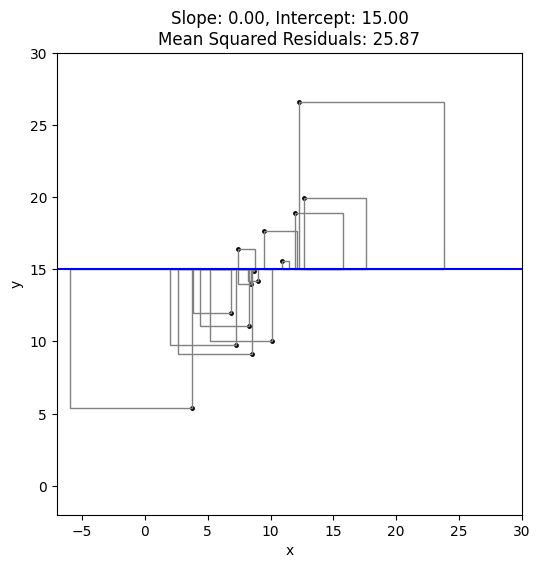

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches

# Generate random data
np.random.seed(0)
num_points = 15
x = np.sort(10 * np.random.rand(num_points)) + 3
y = 2 * x - 4 + 4*np.random.randn(num_points)

# Set the y-intercept
intercept = 1

# Range of slopes for animation
min_slope = 0
max_slope = 2.25
num_frames = 50

min_intercept = -2
max_intercept = 15

slopes = np.linspace(min_slope, max_slope, num_frames)
intercepts = np.linspace(min_intercept, max_intercept, num_frames)


fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(x, y, s=6, c='black')
ax.set_xlim(-7, 30)
ax.set_ylim(-2, 30)
line, = ax.plot([], [], color='blue')


def animate(i):
    ax.clear()
    sc = ax.scatter(x, y, s=6, c='black')
    ax.set_xlim(-7, 30)
    ax.set_ylim(-2, 30)
    line, = ax.plot([], [], color='blue')
    residual_squares = []

    if i >= num_frames:
      i = num_frames - i%num_frames - 1


    slope = slopes[i]
    intercept = intercepts[len(intercepts)-1-i]

    x_new = np.linspace(-7, 30)

    fitted_line = slope * x_new + intercept
    line.set_data(x_new, fitted_line)

    residuals = y - slope*x - intercept
    mean_squared_residual = np.mean(residuals**2)

    for j in range(num_points):
        y_residual = y[j] - (slope * x[j] + intercept)

        if y_residual < 0:
          side_length = - y_residual
          bottom_left_corner = (x[j] - side_length, y[j])
        else:
          side_length = y_residual
          bottom_left_corner = (x[j], y[j]-side_length)



        # Create a square patch
        square = patches.Rectangle(bottom_left_corner, side_length, side_length, fill=False, color='grey')

        # Add the square to the plot
        ax.add_patch(square)

        residual_squares.append(square)

    ax.set_title(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}\nMean Squared Residuals: {mean_squared_residual:.2f}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return line, *residual_squares

ani = animation.FuncAnimation(fig, animate, frames=2*num_frames, interval=100, blit=True)

# Save the animation as a GIF
ani.save('regression_lines_with_residual_squares_animation_v2.gif', writer='pillow')

# Display the plot
plt.show()
